## 本节内容

1. [简介](#简介)
2. [Python库](#Python库)
3. [问题域](#问题域)
4. [第一步:提出问题](#提出问题)
5. [第二步：数据检查](#数据检查)
6. [第三步：数据整理(tidying)](#数据整理)
7. [第四步：数据探索](#数据探索)
8. [第五步：数据分类](#数据分类)
9. [可重复性](#可重复性)

## 简介

[[回到顶部]](#本节内容)


本小节力图通过一个简单的例子来让你对如何进行基于Python的数据分析（机器学习）流程有一个初步概念。同时需要注意这个流程是不完备的，更多的内容我们会在后续章节陆续展开。

## Python库

[[回到顶部]](#本节内容)

首先我们使用的是[Anaconda Python distribution](http://continuum.io/downloads) 

使用到的包：

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

如果你现在还没有安装以上的包，可以使用`conda`命令:

    conda install numpy pandas scikit-learn matplotlib seaborn

如果你的包不是最新的版本`conda` 会提醒你。

## 问题域

[[回到顶部]](#本节内容)

蝴蝶花(iris)的识别？ 

### *Iris setosa*

![](img/iris_setosa.jpg)

### *Iris versicolor*
![](img/iris_versicolor.jpg)

### *Iris virginica*
![](img/iris_virginica.jpg)

**如何将问题与数据对应？图像识别？或者有其他方式？因此问题总是与领域知识有关的！！！**

不同类型的蝴蝶花的萼片以及花瓣的长宽有区别(sepal,petal)，对应数据:
+ sepal length
+ sepal width
+ petal length
+ petal width

![](img/petal_sepal.jpg)

因此我们收集了对应[数据集](../data/iris-data.csv) --其实通过图像识别也可以自动获得这些数据.Apple app store上的leafsnap

![](img/leafsnap.jpg)


**数据源:** 数据集来着[*Iris* data set](https://archive.ics.uci.edu/ml/datasets/Iris)，不过我们使用了[Randal S. Olson](http://www.randalolson.com/)基于此修改的数据来演示数据清洗与整理。

## 提出问题

[[回到顶部]](#本节内容)

数据分析的第一步就是定义：
+ problem
+ measure/measures

>我们的问题是什么?

基于sepal length, sepal width, petal length, petal width来对蝴蝶花进行分类。

>问题成功解决的度量方式?应该达到多少？

分类问题，简单起见我们这里采用[accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision)

>解决这个问题对应的商业应用或科研场景？


>不要忘了数据收集（试验设计）的方式?


>在这之前有无现成数据?



## 数据检查

[[回到顶部]](#本节内容)

* 错误数据?
* 异常数据?
* 删除或者修正?

这里我们会用到pandas

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
import pandas as pd

iris_data = pd.read_csv('../data/iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


每一行是对一种类型花的4种度量结果以及对应的标记(label)，feature的name也很清晰。

**那有没有缺失数据呢？** 

In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_data.isnull().values.any()

True

In [5]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [6]:
iris_data = pd.read_csv('../data/iris-data.csv', na_values=['NA']) #pandas缺省对NA已经处理了

In [7]:
iris_data['petal_width_cm'].isnull().sum()

5

pandas中关于missing data处理  http://pandas.pydata.org/pandas-docs/stable/missing_data.html

数据可视化

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

seaborn里面的**scatterplot matrix**是常用的一种可视化图，它将每列的分布在对角线上画出，同时也画出了每2列的散点图，同时你也可以利用hue变量来指定颜色。

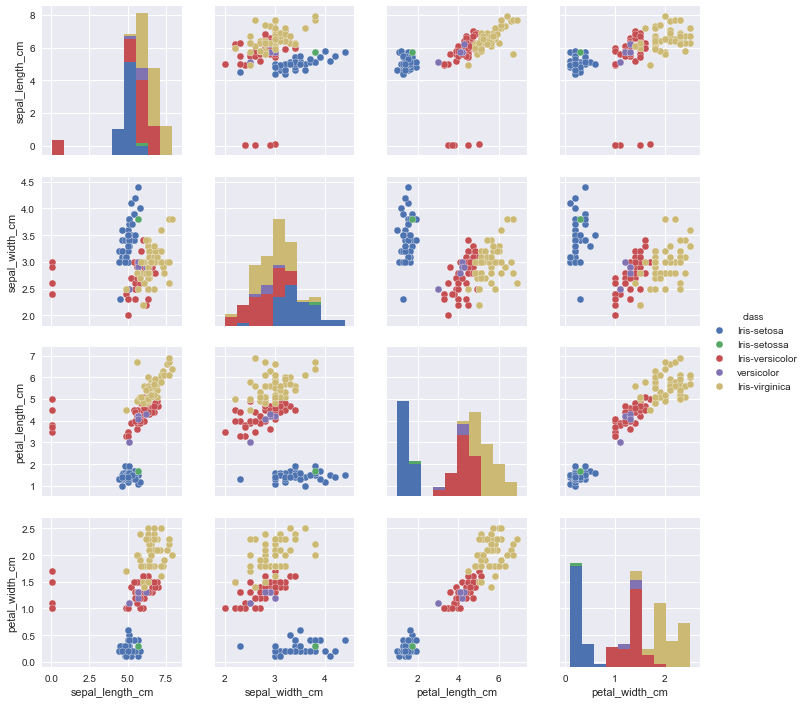

In [9]:
sb.pairplot(iris_data.dropna(), hue='class')

问题：

1. 不是3种花吗？怎么变成了5种？

2. 可疑的异常数据有一个`Iris-setosa`样本的 `sepal_width_cm`偏离大部分点。同时有几个`Iris-versicolor`样本的`sepal_length_cm` 也不太对？

3. 缺失点如何处理？-删除？

## 数据整理

[[ 回到顶部 ]](#本节内容)

In [10]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [11]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**处理异常数据时永远要存有疑问！**是测量误差，录入误差？我这样处理合理吗？

这里简单起见，我们直接把sepal_width_cm在2.5cm以下的Iris-setosa样本去掉了

In [12]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].describe()

count    50.000000
mean      3.418000
std       0.381024
min       2.300000
25%       3.125000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal_width_cm, dtype: float64

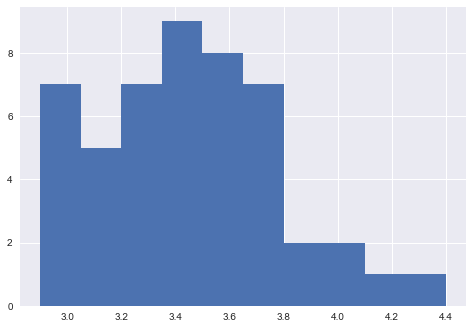

In [13]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

接下来处理`Iris-versicolor` 

In [14]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


小数点位置错了？（这里你需要回到获取数据的阶段，去询问！）假设这里是录入的以m为单位

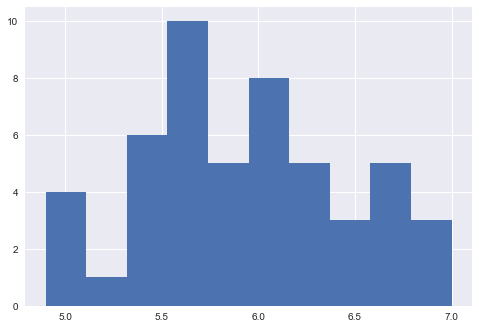

In [15]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()

处理缺失数据

In [16]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


似乎都是`Iris-setosa` 类型，如果drop是否会使得样本不均衡(imbalance)?

采用**mean imputation**?

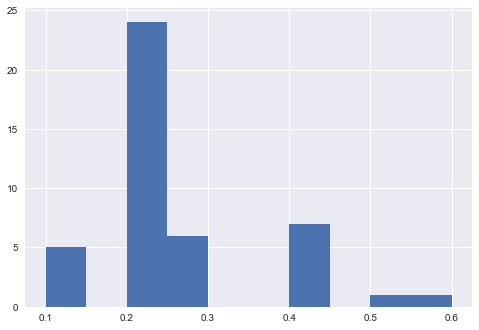

In [17]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].hist()

In [18]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [19]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


当然你也可以采用 
    iris_data.dropna(inplace=True)


In [20]:
iris_data.to_csv('../data/iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

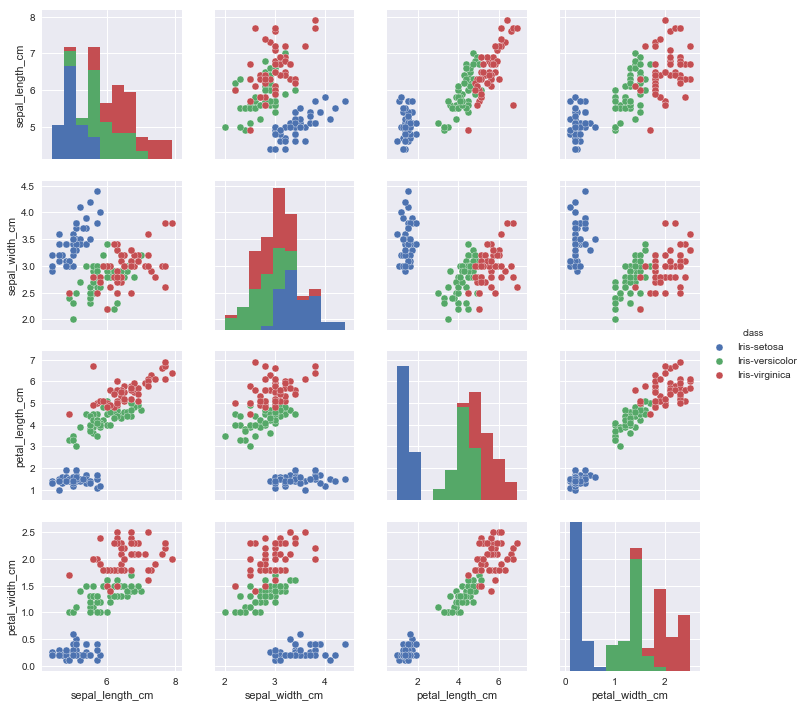

In [21]:
sb.pairplot(iris_data_clean, hue='class')

真实的场景可能复杂得多，我们通常考虑：

* 确定数据正确

* 异常数据（领域知识，可视化）

* 处理缺失数据

* 清理数据过程要可重复

* 可视化

## 数据探索

[[ 回到顶部 ]](#本节内容)


数据探索分析帮助我们了解： 

* 数据分布？

* 数据间存在相关性?

* 有无confounding factors来解释correlations?

*混杂因素(confounding factor). wikipedia https://en.wikipedia.org/wiki/Confounding*

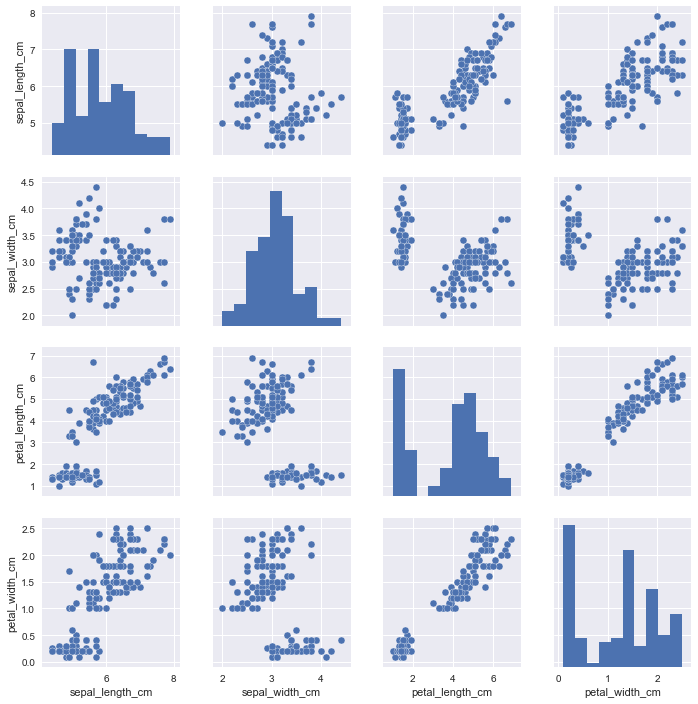

In [22]:
sb.pairplot(iris_data_clean)

大部分情况数据接近正态分布，因此我们选择模型时使用那些假设数据为正态分布的模型。

不过petal数据似乎不是单峰的，也许与花的类型有关？

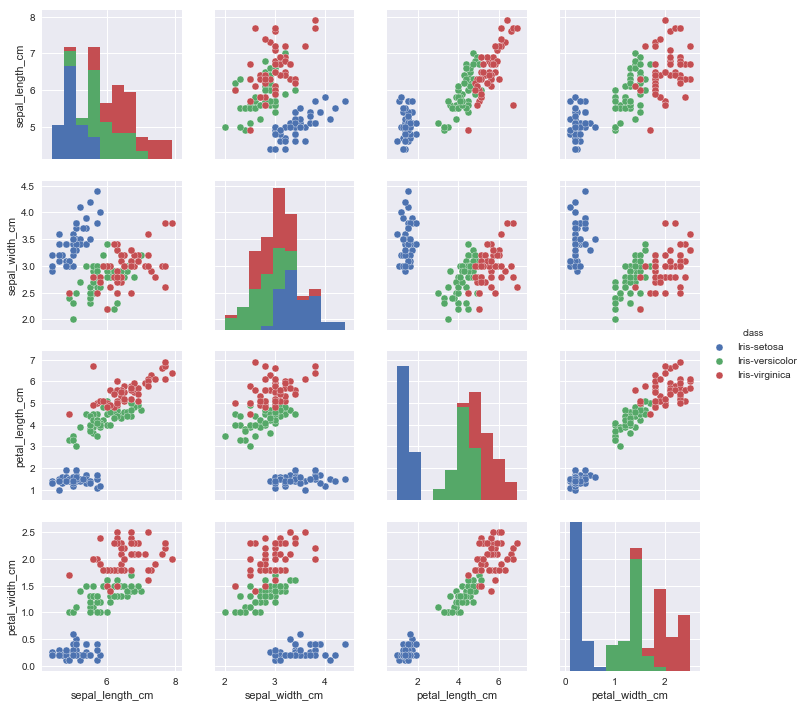

In [23]:
sb.pairplot(iris_data_clean, hue='class')

果然如此！不同类型的花的petal确实不同，那我们肯定可以用它来区分花的类型。比如`Iris-setosa`。不过 `Iris-versicolor` 与 `Iris-virginica` 还存在一些重叠

同时我们可以看出petal length与petal width存在相关关系, sepal length 与 sepal width也类似。

我们也可以使用 **violin plots** 来更详细的观察数据分布。Violin plots实际是盒子图的一种 [box plots](https://en.wikipedia.org/wiki/Box_plot),只是加上了数据分布密度

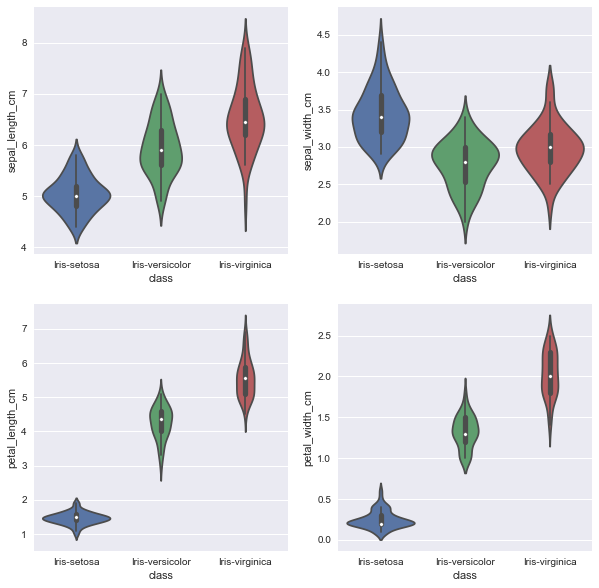

In [24]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

## 数据分类

[[ 回到顶部 ]](#本节内容)

*What*，搞了这么久才进入主题？

 **garbage in garbage out** 

数据分为训练集与测试集

+ **training set** 所有数据的一个随机子集，用于训练模型

+ **testing set** 用来验证模型在未知数据上的表现

避免 **overfitting** 以及**underfitting**

In [25]:
iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')

# scikit-learn需要我们输入numpy array

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [29]:
all_classes[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

测试训练集

In [30]:
from sklearn.cross_validation import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1) # 0.18后使用model_selection模块

C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1) # 0.18后使用model_selection模块

这里我们先使用决策树模型

![](img/iris_dtc.png)

决策树模型的一个优点是不受每个特征数据不同scale影响

更详细的 [parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

看起来很好， 97%的accuracy

不过这只是在这一种train/test split的情况下的结果！

In [35]:
decision_tree_classifier.predict(testing_inputs[1:5])

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [36]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    


(array([   5.,    6.,   31.,    0.,   92.,  223.,    0.,  304.,  252.,   87.]),
 array([ 0.81578947,  0.83421053,  0.85263158,  0.87105263,  0.88947368,
         0.90789474,  0.92631579,  0.94473684,  0.96315789,  0.98157895,  1.        ]),
 <a list of 10 Patch objects>)

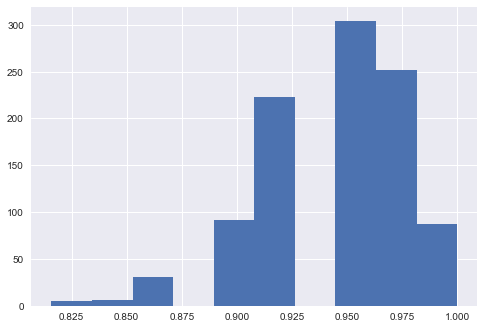

In [37]:
plt.hist(model_accuracies)

显然测试训练集不同，模型的performance不同，显然存在**overfitting**，训练模型训练得过好，泛化不行！



In [38]:
from sklearn.linear_model import LogisticRegression

# Create the classifier
logistic_classifier = LogisticRegression()

# Train the classifier on the training set
logistic_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
logistic_classifier.score(testing_inputs, testing_classes)

0.97368421052631582

In [39]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    logistic_classifier = DecisionTreeClassifier()
    logistic_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = logistic_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

(array([   1.,    3.,    9.,   21.,    0.,   75.,  217.,  324.,  257.,   93.]),
 array([ 0.78947368,  0.81052632,  0.83157895,  0.85263158,  0.87368421,
         0.89473684,  0.91578947,  0.93684211,  0.95789474,  0.97894737,  1.        ]),
 <a list of 10 Patch objects>)

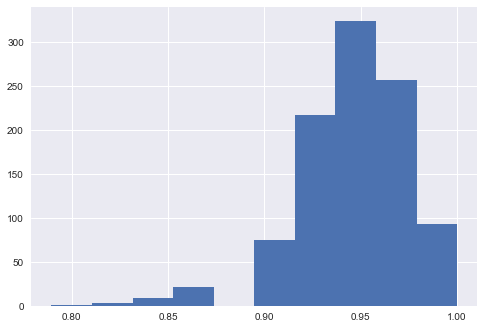

In [40]:
plt.hist(model_accuracies)

### Cross-validation

[[ 回到顶部 ]](#本节内容)


[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  0.93333333  1.          1.        ]


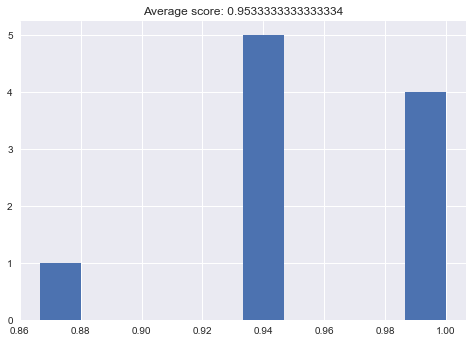

In [42]:
import numpy as np
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
print(cv_scores)

In [43]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV,StratifiedKFold
random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(n_splits=10,random_state=2017)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.9664429530201343
Best parameters: {'max_features': 1, 'warm_start': True, 'n_estimators': 5, 'criterion': 'gini'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)

## 可重复性

[[ 回到顶部 ]](#本节内容)

可以使用工具watermark

In [ ]:
#!pip install watermark

In [49]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [50]:
%watermark?

In [46]:
%watermark -a 'zjdian' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

zjdian Sun Mar 12 2017 

CPython 3.5.2
IPython 5.1.0

numpy 1.11.3
pandas 0.19.2
sklearn 0.18.1
matplotlib 2.0.0
seaborn 0.7.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 7
machine    : AMD64
processor  : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [48]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

iris_data_clean = pd.read_csv('../data/iris-data-clean.csv')


all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))

[ 6.   2.2  4.   1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 4.9  3.1  1.5  0.1]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.5  4.2  1.4  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 7.7  2.6  6.9  2.3]	-->	Iris-virginica	(Actual: Iris-virginica)
[ 6.8  2.8  4.8  1.4]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.   3.3  1.4  0.2]	-->	Iris-setosa	(Actual: Iris-setosa)
[ 5.8  2.7  4.1  1. ]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 5.7  2.8  4.5  1.3]	-->	Iris-versicolor	(Actual: Iris-versicolor)
[ 6.   2.2  5.   1.5]	-->	Iris-versicolor	(Actual: Iris-virginica)
[ 5.1  3.7  1.5  0.4]	-->	Iris-setosa	(Actual: Iris-setosa)


## 参考资料

[The Elements of Data Analytic Style](https://leanpub.com/datastyle)

[**Dive Into Python 3**](http://www.diveintopython3.net/)

[**pandas**](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

[**scikit-learn**](http://scikit-learn.org/stable/tutorial/index.html)

[**matplotlib**](http://matplotlib.org/resources/index.html)

[**Seaborn**](http://stanford.edu/~mwaskom/software/seaborn/tutorial.html)